# 🚀 PHASE 1

# 🟢 STEP 1 — Import & Load Data

In [1]:
import pandas as pd
import numpy as np

# Load datasets
trades = pd.read_csv("historical_data.csv")
sentiment = pd.read_csv("fear_greed_index.csv")

# Basic info
print("Trades Shape:", trades.shape)
print("Sentiment Shape:", sentiment.shape)

trades.head()
sentiment.head()


Trades Shape: (211224, 16)
Sentiment Shape: (2644, 4)


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


# 🟢 STEP 2 — Data Type Check

In [2]:
trades.info()
sentiment.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

# 🟢 STEP 3 — Missing Values Check

In [3]:
trades.isnull().sum()
sentiment.isnull().sum()


timestamp         0
value             0
classification    0
date              0
dtype: int64

## Format check Timestamps

In [5]:
trades['Timestamp IST'].head(10)


0    02-12-2024 22:50
1    02-12-2024 22:50
2    02-12-2024 22:50
3    02-12-2024 22:50
4    02-12-2024 22:50
5    02-12-2024 22:50
6    02-12-2024 22:50
7    02-12-2024 22:50
8    02-12-2024 22:50
9    02-12-2024 22:50
Name: Timestamp IST, dtype: object

In [6]:
trades['Timestamp IST'] = pd.to_datetime(
    trades['Timestamp IST'], 
    format='%d-%m-%Y %H:%M'
)


## date Extract

In [7]:
trades['trade_date'] = trades['Timestamp IST'].dt.date


## sentiment date convert 

In [8]:
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date


## check output

In [9]:
trades[['Timestamp IST','trade_date']].head()
sentiment.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


## 🎯 — MERGE

In [11]:
merged_df = trades.merge(
    sentiment[['date','classification']],
    left_on='trade_date',
    right_on='date',
    how='left'
)

print("Merged Shape:", merged_df.shape)
merged_df.head()


Merged Shape: (211224, 19)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,trade_date,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,2024-12-02,Extreme Greed


## 🟢 Null Sentiment Count

In [12]:
merged_df['classification'].isnull().sum()


np.int64(6)

# 🚀 PHASE 2 — CORE METRICS START

## 🔥 STEP 1: Sentiment Distribution

In [13]:
merged_df['classification'].value_counts()


classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64

In [14]:
merged_df['classification'].value_counts(normalize=True) * 100


classification
Fear             29.276387
Greed            23.815679
Extreme Greed    18.933992
Neutral          17.842229
Extreme Fear     10.131712
Name: proportion, dtype: float64

## Profitability by Sentiment

In [15]:
merged_df.groupby('classification')['Closed PnL'].agg(['count','mean','sum'])


,count,mean,sum
classification,,,
Extreme Fear,21400,34.537862,7.391102e+05
Extreme Greed,39992,67.892861,2.715171e+06
Fear,61837,54.290400,3.357155e+06
Greed,50303,42.743559,2.150129e+06
Neutral,37686,34.307718,1.292921e+06


🟥 1️⃣ Extreme Fear

Trades: 21,400

Avg Profit: ₹34.53

Total Profit: ₹7.39 lakh

👉 Matlab: Log dar ke time bhi profit kama rahe the
👉 But average profit low hai


🟢 2️⃣ Extreme Greed

Trades: 39,992

Avg Profit: ₹67.89 (🔥 Highest)

Total Profit: ₹27.15 lakh

👉 Ye sabse profitable sentiment hai
👉 Jab market bahut greed me tha, tab sabse zyada average profit bana


🟡 3️⃣ Fear

Trades: 61,837 (Highest volume)

Avg Profit: ₹54.29

Total Profit: ₹33.57 lakh (🔥 Highest Total)

👉 Fear period me sabse zyada trading activity hui
👉 Aur total sabse zyada paisa yahi bana


🟢 4️⃣ Greed

Trades: 50,303

Avg Profit: ₹42.74

Total Profit: ₹21.5 lakh

👉 Stable profit, but Extreme Greed jitna strong nahi



⚪ 5️⃣ Neutral

Trades: 37,686

Avg Profit: ₹34.30

Total Profit: ₹12.92 lakh

👉 Sabse weak performance
👉 Neutral market me strong movement nahi hota

🧠 FINAL PROFESSIONAL INSIGHT

🔥 Most profitable per trade = Extreme Greed
🔥 Highest total money made = Fear
😴 Least exciting = Neutral

## Win rate 

In [16]:
# Win Rate
merged_df['Win'] = merged_df['Closed PnL'] > 0

merged_df.groupby('classification')['Win'].mean()


classification
Extreme Fear     0.370607
Extreme Greed    0.464943
Fear             0.420768
Greed            0.384828
Neutral          0.396991
Name: Win, dtype: float64

## Loss Severity

In [17]:
merged_df[merged_df['Closed PnL'] < 0].groupby('classification')['Closed PnL'].mean()


classification
Extreme Fear    -257.099629
Extreme Greed   -119.920289
Fear            -156.662401
Greed           -181.967329
Neutral         -121.727849
Name: Closed PnL, dtype: float64

## 🎯 Full Behavioral Picture

| Sentiment     | Win Rate | Avg Profit | Avg Loss | Risk Level   |
| ------------- | -------- | ---------- | -------- | ------------ |
| Extreme Greed | Highest  | Highest    | Lowest   | 🟢 Best      |
| Fear          | Good     | Strong     | Moderate | 🟡 Balanced  |
| Greed         | Medium   | Medium     | High     | 🟠 Risky     |
| Extreme Fear  | Lowest   | Low        | Highest  | 🔴 Dangerous |


## 📊 Median & 25% Quantile

In [18]:
merged_df.groupby('classification')['Closed PnL'].quantile([0.25, 0.5])


classification      
Extreme Fear    0.25    0.0
                0.50    0.0
Extreme Greed   0.25    0.0
                0.50    0.0
Fear            0.25    0.0
                0.50    0.0
Greed           0.25    0.0
                0.50    0.0
Neutral         0.25    0.0
                0.50    0.0
Name: Closed PnL, dtype: float64

In [19]:
merged_df['Closed PnL'].value_counts().head(10)


Closed PnL
 0.000000     106816
 0.146908         80
-1.566400         71
 9.903600         67
 88.459120        62
 0.059631         51
 0.066620         50
 0.095175         50
 1.149000         46
 1.955000         45
Name: count, dtype: int64

In [21]:
real_trades = merged_df[merged_df['Closed PnL'] != 0]


## ✅ 1️⃣ Real Win Rate (Zero Trades Remove Karne Ke Baad)

In [22]:
real_trades['Win'] = real_trades['Closed PnL'] > 0
real_trades.groupby('classification')['Win'].mean()



C:\Users\Asus\AppData\Local\Temp\ipykernel_2764\978106587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_trades['Win'] = real_trades['Closed PnL'] > 0


classification
Extreme Fear     0.762156
Extreme Greed    0.891670
Fear             0.872886
Greed            0.768907
Neutral          0.823889
Name: Win, dtype: float64

## ✅ 2️⃣ Real Quantile Rate (Zero Trades Remove Karne Ke Baad)

In [23]:
real_trades.groupby('classification')['Closed PnL'].quantile([0.25,0.5])


classification      
Extreme Fear    0.25    0.024314
                0.50    6.388050
Extreme Greed   0.25    1.143404
                0.50    8.530740
Fear            0.25    0.628873
                0.50    6.350483
Greed           0.25    0.049465
                0.50    4.927600
Neutral         0.25    0.224754
                0.50    4.583458
Name: Closed PnL, dtype: float64

🎯 Ab Final Behavioral Picture

🟢 Extreme Greed

✔ Highest win rate
✔ Highest median profit
✔ Strong lower bound (Q1)
✔ Earlier dekha tha loss bhi smallest
🔥 BEST MARKET CONDITION


🟡 Fear

✔ Strong win rate
✔ Good median
✔ Balanced risk


🔴 Extreme Fear

✔ Win rate ok hai
❌ But loss severity high
❌ Lower bound profit weak

High volatility zone.

## 🎯 Risk-Reward Ratio (RRR)

In [24]:
profit_avg = real_trades[real_trades['Closed PnL'] > 0].groupby('classification')['Closed PnL'].mean()

loss_avg = real_trades[real_trades['Closed PnL'] < 0].groupby('classification')['Closed PnL'].mean()

rrr = profit_avg / abs(loss_avg)

rrr


classification
Extreme Fear     0.674543
Extreme Greed    1.339167
Fear             0.969224
Greed            0.910942
Neutral          0.923695
Name: Closed PnL, dtype: float64

## 📊 Volatility (Risk Stability Check)

In [25]:
real_trades.groupby('classification')['Closed PnL'].std()


classification
Extreme Fear     1628.408341
Extreme Greed    1058.126139
Fear             1344.778427
Greed            1576.394764
Neutral           743.212863
Name: Closed PnL, dtype: float64

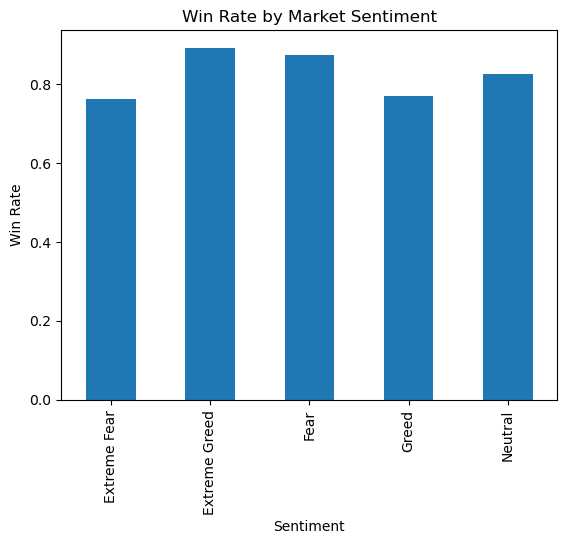

In [26]:
import matplotlib.pyplot as plt

win_rate = real_trades.groupby('classification')['Win'].mean()

plt.figure()
win_rate.plot(kind='bar')
plt.title("Win Rate by Market Sentiment")
plt.ylabel("Win Rate")
plt.xlabel("Sentiment")
plt.show()


In [27]:
real_trades.groupby('classification')['Size USD'].mean()


classification
Extreme Fear     5467.570419
Extreme Greed    2779.563632
Fear             8041.140445
Greed            5438.671764
Neutral          5556.444833
Name: Size USD, dtype: float64

In [28]:
# Check date ranges
print(f"Trades range: {trades['trade_date'].min()} to {trades['trade_date'].max()}")
print(f"Sentiment range: {sentiment['date'].min()} to {sentiment['date'].max()}")

# Missing dates check
missing_dates = trades[~trades['trade_date'].isin(sentiment['date'])]['trade_date'].unique()
print(f"Dates with missing sentiment: {len(missing_dates)}")

Trades range: 2023-05-01 to 2025-05-01
Sentiment range: 2018-02-01 to 2025-05-02
Dates with missing sentiment: 1


In [29]:
# Woh 1 missing date dekhne ke liye
print(missing_dates)

[datetime.date(2024, 10, 26)]
